     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object
--- some data in head ---
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
--- some data in tail ---
            #Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432
$$ data index will show dtype=datetime64[ns]
# check datatype of index
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-0

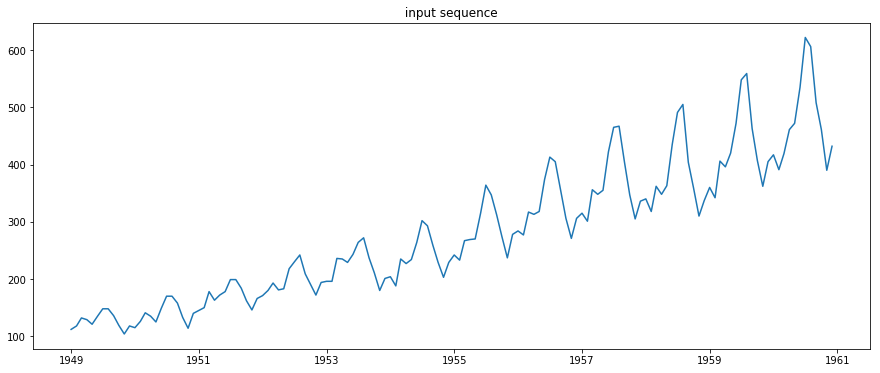

In [32]:
# -*- coding: utf-8 -*-

'''
    https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Time_Series_Analysis/Time_Series_AirPassenger.ipynb


'''

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Note: aim is not to teach stock price forecasting. It's a very complex domain and I have almost no clue about it.
# Here I will demonstrate the various techniques which can be used for time-series forecasting
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

#
# reading as datetime format
#
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#dateparse('1962-01')
#data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
print ('--- some data in head ---')
print (data.head())
print ('--- some data in tail ---')
print (data.tail())
print ('$$ data index will show dtype=datetime64[ns]')

print ('# check datatype of index')
print (data.index)

print ('# extract a column and convert it to time series:')
ts = data['#Passengers']
print(ts.head(10), '\n')
print ('ts at 1949-01-01 is {}'.format(ts['1949-01-01']))
print ('ts at 1949-01-01 is {}'.format(ts[datetime(1949,1,1)]))
print ('ts in 1949 is\n{}'.format(ts['1949']))

print ('# now plot a ts')
plt.plot(ts)
#plt.show() # blocking
plt.title (' input sequence ')
plt.draw()

In [8]:
#
# functions for testing stationarity of the time series
#

from statsmodels.tsa.stattools import adfuller

def test_stationarity (tseries):
    # determine rolling statistics
    rolling = tseries.rolling(window=12)
    rolmean = rolling.mean()
    rolstd = rolling.std()

    #plot rolling statistiscs
    plt.figure()
    orig = plt.plot(tseries, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolmean+rolstd, color='black', label='rolling std')
    std2 = plt.plot(rolmean-rolstd, color='black')

    plt.legend (loc='best');
    plt.title ('rolling mean & std')
    plt.show (block=False)

    # perform Augmented Dickey-Fuller test
    # https://www.otexts.org/fpp/8/1 : adf test can be used to test the stationarity of a signal.
    print ('# results of Dickey-Fuller Test: ')
    dftest = adfuller(tseries, autolag='AIC')
    dfoutput = pd.Series (dftest[0:4], index=['test stat', 'p-val', '#lags used', '# observations used'])
    for key, v in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)] = v
    print (dfoutput)
    print ('## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity\n',
           'Using the usual 5% threshold, differencing is required if the p-value is > 0.05\n',
           'Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.'
           )

    if dfoutput['p-val']>0.05:
        print ('!! this time series is not stationary at all p-val({})>0.05'.format(dfoutput['p-val']))
    else:
        print ('!! this time series looks stationary because p-val < 0.05')
#

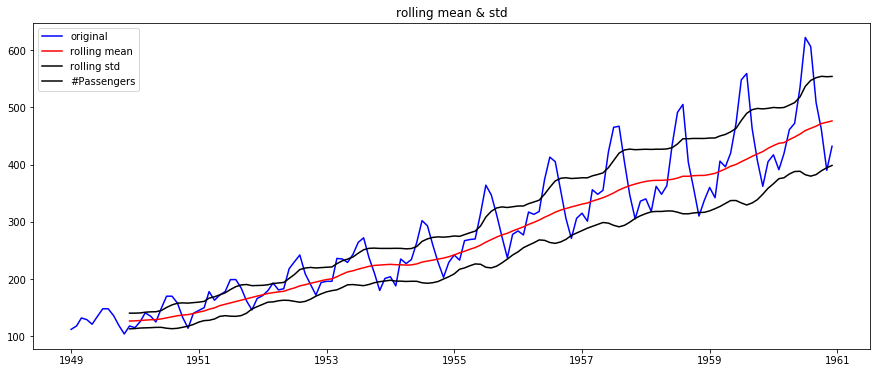

# results of Dickey-Fuller Test: 
test stat                0.815369
p-val                    0.991880
#lags used              13.000000
# observations used    130.000000
Critical Value 1%       -3.481682
Critical Value 5%       -2.884042
Critical Value 10%      -2.578770
dtype: float64
## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity
 Using the usual 5% threshold, differencing is required if the p-value is > 0.05
 Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
!! this time series is not stationary at all p-val(0.9918802434376411)>0.05
Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64
Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-

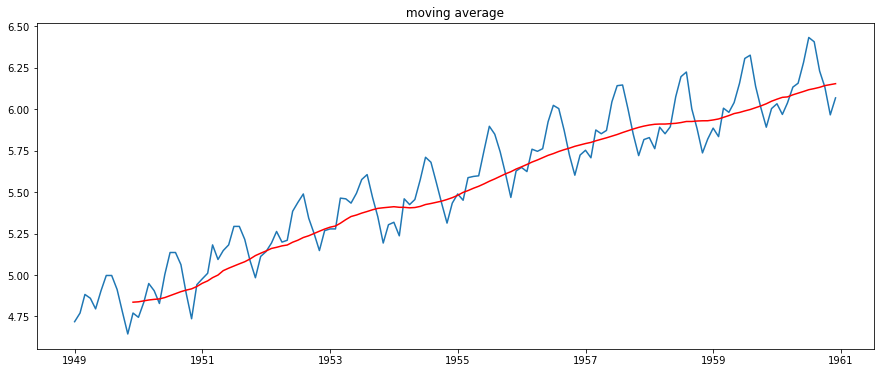

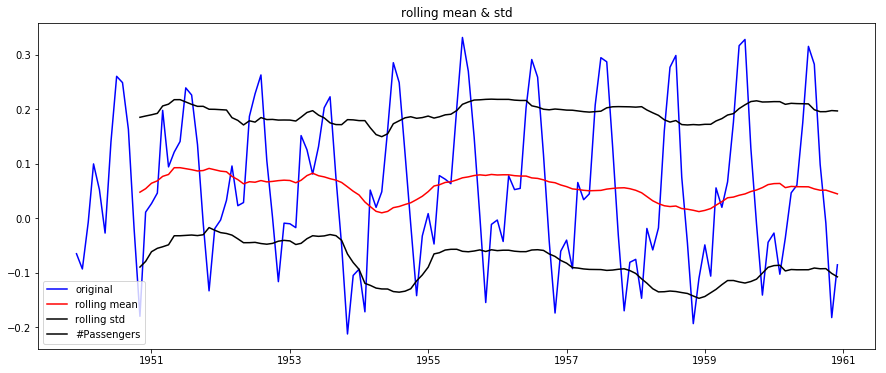

# results of Dickey-Fuller Test: 
test stat               -3.162908
p-val                    0.022235
#lags used              13.000000
# observations used    119.000000
Critical Value 1%       -3.486535
Critical Value 5%       -2.886151
Critical Value 10%      -2.579896
dtype: float64
## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity
 Using the usual 5% threshold, differencing is required if the p-value is > 0.05
 Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
!! this time series looks stationary because p-val < 0.05


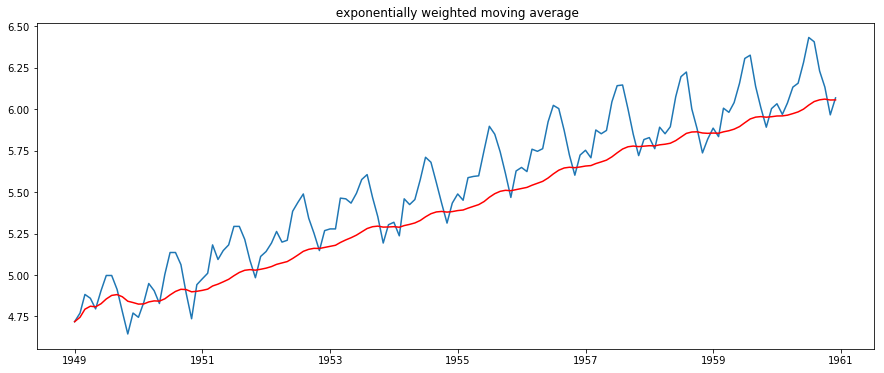

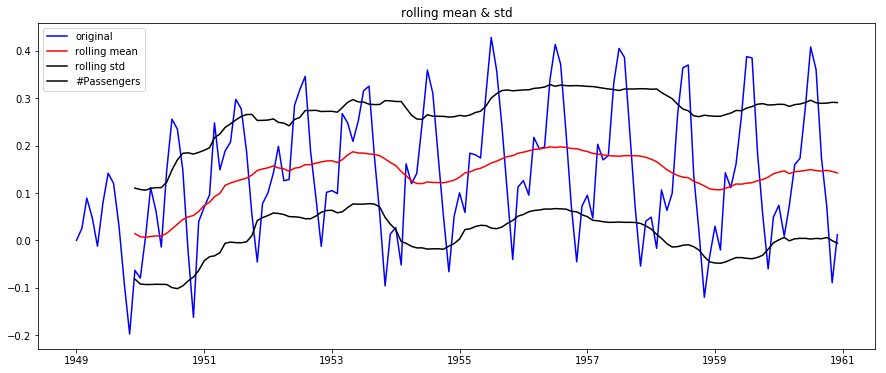

# results of Dickey-Fuller Test: 
test stat               -3.601262
p-val                    0.005737
#lags used              13.000000
# observations used    130.000000
Critical Value 1%       -3.481682
Critical Value 5%       -2.884042
Critical Value 10%      -2.578770
dtype: float64
## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity
 Using the usual 5% threshold, differencing is required if the p-value is > 0.05
 Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
!! this time series looks stationary because p-val < 0.05
# Kill the plot window to finish.


In [9]:
#
test_stationarity(ts)

#
# Making a TS Stationary
#

# first way is difference of log-scales

# 1. log scale
tslog = np.log (ts)
plt.figure()
plt.plot (tslog)
plt.title (' log (ts)')

window = 12
# 2. moving average
mavg = tslog.rolling (window=window).mean()
plt.plot (mavg, color='red')
plt.title (' moving average ')

tslog_mavg = tslog - mavg
print (tslog_mavg.head(window))
tslog_mavg.dropna (inplace=True)
print (tslog_mavg.head(window))

test_stationarity(tslog_mavg)

# another moving average method is Exponentially weighted moving average
exp_mavg = tslog.ewm(halflife=window).mean()
plt.figure()
plt.title (' exponentially weighted moving average')
plt.plot(tslog)
plt.plot(exp_mavg, color='red')

tslog_expmavg = tslog - exp_mavg
tslog_expmavg.dropna(inplace=True)

test_stationarity(tslog_expmavg)
print ('# Kill the plot window to finish.')
plt.draw()

## Seasonality and Trend decomposition


Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
Name: #Passengers, dtype: float64


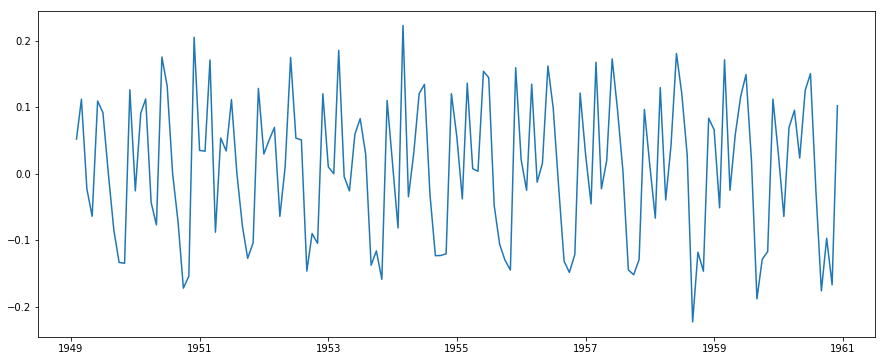

In [5]:
tslog_d1 = tslog - tslog.shift()
print (tslog_d1.head(10))
plt.plot (tslog_d1)

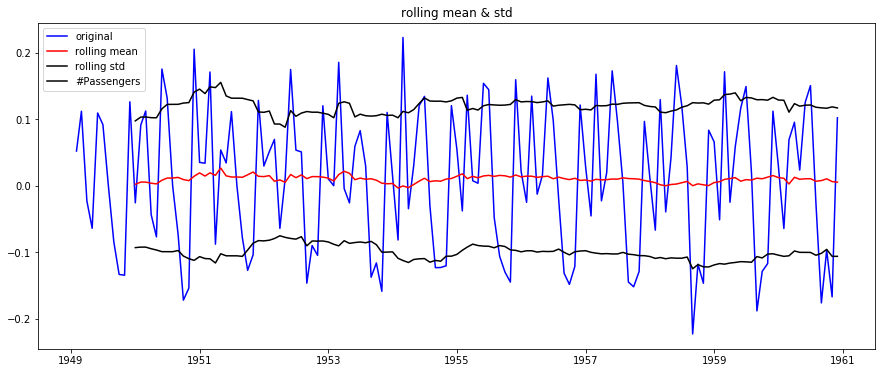

# results of Dickey-Fuller Test: 
test stat               -2.717131
p-val                    0.071121
#lags used              14.000000
# observations used    128.000000
Critical Value 1%       -3.482501
Critical Value 5%       -2.884398
Critical Value 10%      -2.578960
dtype: float64
## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity
 Using the usual 5% threshold, differencing is required if the p-value is > 0.05
 Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
!! this time series is not stationary at all p-val(0.07112054815085395)>0.05


In [6]:
tslog_d1.dropna(inplace=True)
test_stationarity (tslog_d1)

## STL (or STE) decomposition

$ y_t = S_t + T_t + E_t$

- $y_t$: Tnput time sequence
- $S_t$: Seasonal component at period $t$
- $T_t$: Trend-cycle component at period $t$
- $E_t$: Remainder/Residual term at $t$

Month
1959-12-01    6.102013
1960-01-01    6.112511
1960-02-01    6.121153
1960-03-01    6.128381
1960-04-01    6.137437
1960-05-01    6.145733
1960-06-01    6.151526
1960-07-01         NaN
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01         NaN
Name: #Passengers, dtype: float64


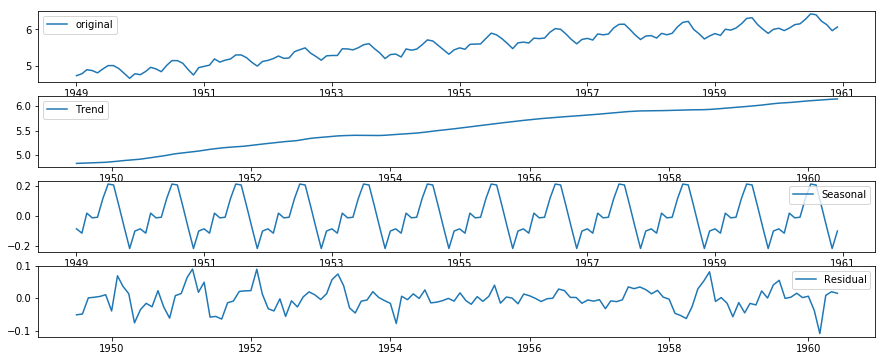

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

#
# seasonal decomposition is just simple
#
decomp = seasonal_decompose (tslog)

print (decomp)

trend = decomp.trend
seas = decomp.seasonal
res  = decomp.resid

print (trend.tail(13))

plt.subplot(411)
plt.plot (tslog, label='original'); plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend'); plt.legend(loc='best')
plt.subplot(413)
plt.plot(seas, label='Seasonal'); plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residual'); plt.legend(loc='best')
#plt.tight_layout()


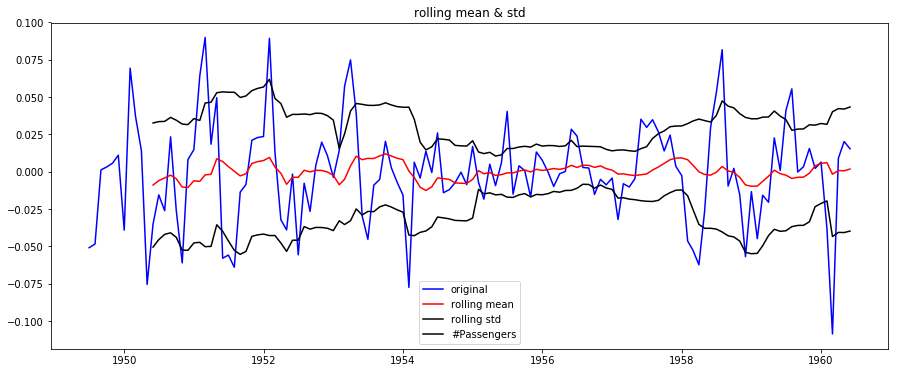

# results of Dickey-Fuller Test: 
test stat             -6.332387e+00
p-val                  2.885059e-08
#lags used             9.000000e+00
# observations used    1.220000e+02
Critical Value 1%     -3.485122e+00
Critical Value 5%     -2.885538e+00
Critical Value 10%    -2.579569e+00
dtype: float64
## Large p-values are indicative of non-stationarity, and small p-values suggest stationarity
 Using the usual 5% threshold, differencing is required if the p-value is > 0.05
 Another popular unit root test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
!! this time series looks stationary because p-val < 0.05


In [16]:
test_stationarity (res.dropna())

# Forecasting with ARIMA

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools   import acf, pacf

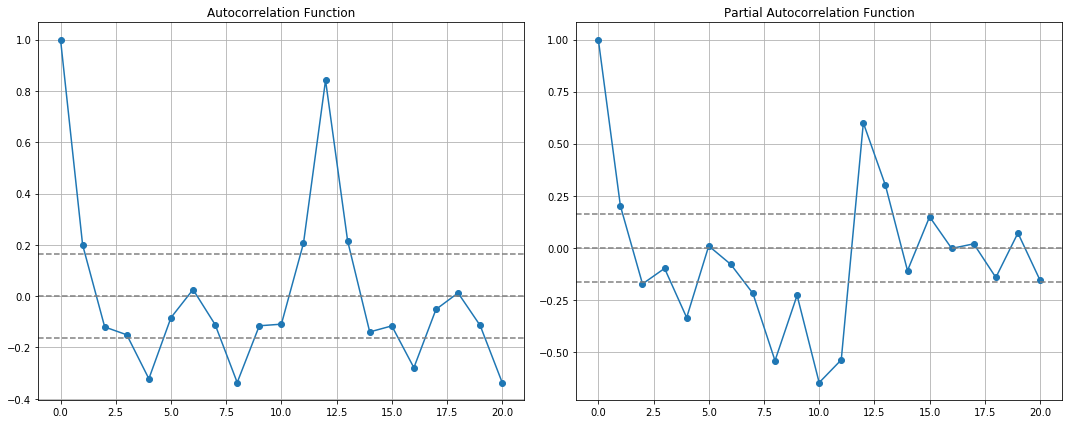

In [27]:
lag_acf = acf(tslog_d1, nlags=20)
lag_pacf = pacf(tslog_d1, nlags=20, method='ols')

ts_log_diff = tslog_d1
#Plot ACF:    
plt.subplot(121)    
plt.grid()
plt.plot(lag_acf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.grid()
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.